# ML-8. Ансамблирование. Бэггинг, стекинг, бустинг

Для этого возьмём [датасет по решению задачи на прогрессирование диабета](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset).

Мы будем предсказывать уровень прогрессирования болезни относительно базового уровня (некоторая численная мера, насколько «сильно» болен пациент диабетом). 

Минимальное значение составляет 25, максимальное — 346. 

Далее посмотрим на распределение, чтобы убедиться, что это не многоклассовая классификация, данные нормированы и закодированы категориальным кодировщиком. 

Качество будем измерять по среднему квадрату ошибки (MSE) на кросс-валидации с точностью до второго знака после запятой. 

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

**Загрузка данных**

In [2]:
data = load_diabetes(as_frame=True)
X = data['frame']
y = data['target']

In [3]:
X

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
0   -0.002592  0.019907 -0.017646   151.0  
1   -0.039493 -0.068332 -0.092204    75.0  
2   -0.002592  0.002861 -0.025930   141.0  
3    0.034309  0.022688 -0.009362   206.0  
4   -0.002592 -0.031988 -0.046641   135.0  
..        ...       ...       ...     ...  
437 -0.002592  0.031193  0.007207   178.0  
438  0.034309 -0.018114  0.044485   104.0  
439 -0.011080 -0.046883  0.015491   132.0  
440  0.026560  0.044529 -0.025930   220.0  
441 -0.039493 -0.004222  0.003064    57.0  

[442 rows x 11 columns]

In [4]:
# В базовом решении есть ошибка, явная утечка данных
# Целевой признак target входит в X матрицу
# X.drop(columns='target', inplace=True)

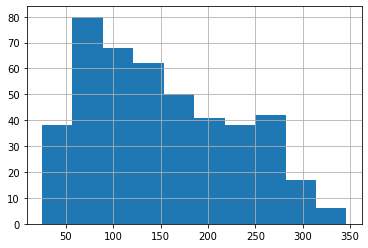

In [5]:
y.hist();

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
print(f'Размерность обучающей выборки {X_train.shape}')
print(f'Размерность тестовой выборки {X_test.shape}')

Размерность обучающей выборки (296, 11)
Размерность тестовой выборки (146, 11)


## Бэггинг: случайный лес. 


In [8]:
regr1 = DecisionTreeRegressor(max_depth=10, random_state=42)
regr1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [9]:
regr2 = RandomForestRegressor(max_depth=10, n_estimators=10, random_state=42)
regr2.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=10, random_state=42)

In [10]:
y_pred1 = regr1.predict(X_test)
y_pred2 = regr2.predict(X_test)

print(f'Качество предсказания по MSE для решающего дерева {mean_squared_error(y_test, y_pred1):.2f}')
print(f'Качество предсказания по MSE для случайного леса {mean_squared_error(y_test, y_pred2):.2f}')

Качество предсказания по MSE для решающего дерева 4.06
Качество предсказания по MSE для случайного леса 1.84


### Задание 2.6
Одним из самых важных параметров, который непосредственно отвечает за переобучение и недообучение в деревьях, является глубина дерева. 

Предлагается используя код из модуля попытаться добиться недообучения для решающего дерева и случайного леса. 

Для этого:

Используя код из модуля, поставьте глубину деревьев в решающем дереве и случайном лесу, равную 2.

В качестве ответа приведите MSE решающего дерева и случайного леса (по модулю), округлённую до второго знака после запятой.

In [11]:
max_depth=2

regr1 = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
regr1.fit(X_train, y_train)

regr2 = RandomForestRegressor(max_depth=max_depth, n_estimators=10, random_state=42)
regr2.fit(X_train, y_train)

y_pred1 = regr1.predict(X_test)
y_pred2 = regr2.predict(X_test)

print(f'Качество предсказания по MSE для решающего дерева {mean_squared_error(y_test, y_pred1):.2f}')
print(f'Качество предсказания по MSE для случайного леса {mean_squared_error(y_test, y_pred2):.2f}')

Качество предсказания по MSE для решающего дерева 397.47
Качество предсказания по MSE для случайного леса 303.12


### Задание 2.7
Известно, что при большой глубине деревья склонны к переобучению. 

В данном задании предлагается, используя код и прошлого задания, попытаться искусственно добиться переобучения модели решающего дерева и случайного леса.

Используя код из модуля, поставьте глубину деревьев в решающем дереве и случайном лесу, равную 1000.

In [17]:
max_depth=1000

regr1 = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
regr1.fit(X_train, y_train)

regr2 = RandomForestRegressor(max_depth=max_depth, n_estimators=10, random_state=42)
regr2.fit(X_train, y_train)

y_pred1 = regr1.predict(X_test)
y_pred2 = regr2.predict(X_test)

print(f'Качество предсказания по MSE для решающего дерева {mean_squared_error(y_test, y_pred1):.2f}')
print(f'Качество предсказания по MSE для случайного леса {mean_squared_error(y_test, y_pred2):.2f}')

Качество предсказания по MSE для решающего дерева 4.06
Качество предсказания по MSE для случайного леса 1.84


 ## Стекинг

In [18]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

In [26]:
random_state=42

# Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('lr', RidgeCV()),
    ('dt', DecisionTreeRegressor(random_state=random_state))
]

# Создаем объект класса стекинг
st_reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=10, random_state=random_state)
)

# Обучаем модель
st_reg.fit(X_train, y_train)

StackingRegressor(estimators=[('lr', RidgeCV()),
                              ('dt', DecisionTreeRegressor(random_state=42))],
                  final_estimator=RandomForestRegressor(n_estimators=10,
                                                        random_state=42))

In [27]:
y_pred_stack = st_reg.predict(X_test)
print(f'Качество предсказания по MSE для стекинга {mean_squared_error(y_test, y_pred_stack):.2f}')

Качество предсказания по MSE для стекинга 0.81


Посмотреть на метапризнаки можно с помощью метода transform(). Для этого в метод нужно передать матрицу наблюдений X. В результате вызова метода для всех объектов каждая из трёх моделей сделает предсказание вероятностей и вернёт матрицу из двух столбцов. Оформим её в виде DataFrame:

In [24]:
meta_data = st_reg.transform(X_train)

# Создаем DataFrame
meta_df = pd.DataFrame(
    meta_data, # содержимое таблицы
    index=X_train.index, # для соответствия индексов датафрейма метапризнаков индексам исходного датафрейма признаков X_train
    columns=['meta_feature1', 'meta_feature2',] # название столбцов
)

meta_df.head()

meta_feature1  meta_feature2
231     154.000000          154.0
325     192.000001          192.0
193     116.000002          116.0
109      81.000007           81.0
195     122.000005          122.0

Можно объединить изначальные признаки и мета-признаки в единый датафрейм и использовать его для обучения

In [25]:
X_train_full = X_train.join(meta_df)
X_train_full

age       sex       bmi        bp        s1        s2        s3  \
231  0.009016 -0.044642 -0.030996  0.021872  0.008063  0.008707  0.004460   
325 -0.001882 -0.044642  0.054152 -0.066506  0.072732  0.056619 -0.043401   
193  0.009016  0.050680 -0.005128 -0.064199  0.069981  0.083863 -0.039719   
109  0.038076  0.050680 -0.009439  0.002351  0.001183  0.037517 -0.054446   
195  0.027178  0.050680  0.025051  0.014987  0.025950  0.048477 -0.039719   
..        ...       ...       ...       ...       ...       ...       ...   
106 -0.096328 -0.044642 -0.076264 -0.043542 -0.045599 -0.034821  0.008142   
270  0.005383  0.050680  0.030440  0.083844 -0.037344 -0.047347  0.015505   
348  0.030811 -0.044642 -0.020218 -0.005670 -0.004321 -0.029497  0.078093   
435 -0.012780 -0.044642 -0.023451 -0.040099 -0.016704  0.004636 -0.017629   
102 -0.092695 -0.044642  0.028284 -0.015999  0.036958  0.024991  0.056003   

           s4        s5        s6  target  meta_feature1  meta_feature2  
231 -0.002592  0.009434  0.011349   154.0     154.000000          154.0  
325  0.084863  0.084492  0.048628   192.0     192.000001          192.0  
193  0.071210  0.039542  0.019633   116.0     116.000002          116.0  
109  0.050176 -0.025953  0.106617    81.0      81.000007           81.0  
195  0.034309  0.007838  0.023775   122.0     122.000005          122.0  
..        ...       ...       ...     ...            ...            ...  
106 -0.039493 -0.059471 -0.083920   134.0     133.999994          134.0  
270 -0.039493  0.008641  0.015491   202.0     201.999999          202.0  
348 -0.039493 -0.010903 -0.001078   148.0     147.999998          148.0  
435 -0.002592 -0.038460 -0.038357    64.0      64.000006           64.0  
102 -0.039493 -0.005142 -0.001078   302.0     301.999983          302.0  

[296 rows x 13 columns]

### Задание 3.5
Для выполнения задания используйте набор данных о диабете, который представлен в ноутбуке с примерами.

Постройте стекинг из следующих базовых моделей:
* Ридж-регрессия (RidgeCV());
* Линейная регрессия.

В качестве метамодели используйте случайный лес с:
* количеством деревьев 100, 
* максимальной глубиной 10, 
* все параметры для базовых моделей стандартные. 
* Для всех алгоритмов параметр random_state=42.

Сделайте предсказание целевой метки для тестового набора данных. 

Рассчитайте метрику MSE для набора данных и запишите её в качестве ответа с точностью до одного знака после запятой.

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
random_state=42

# Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('RidgeCV', RidgeCV()),
    ('LinearRegression',  LinearRegression()),
]

# Создаем объект класса стекинг
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=100,
                                          max_depth=10,
                                          random_state=random_state)
)

# Обучаем модель
reg.fit(X_train, y_train)

StackingRegressor(estimators=[('RidgeCV', RidgeCV()),
                              ('LinearRegression', LinearRegression())],
                  final_estimator=RandomForestRegressor(max_depth=10,
                                                        random_state=42))

In [30]:
y_pred_stack_2 = reg.predict(X_test)
print(f'Качество предсказания по MSE для стекинга {mean_squared_error(y_test, y_pred_stack_2):.1f}')

Качество предсказания по MSE для стекинга 0.3


 ## Бустинг
 



### Адаптивный бустинг

* base_estimator — параметр отвечает за природу базовых моделей, по умолчанию это DecisionTreeRegressor c максимальной глубиной (max_depth) 3.
* n_estimators — максимальное количество базовых моделей, по умолчанию равно 50. В случае идеального обучения алгоритм завершается ранее, чем данное значение.
* learning_rate — темп обучения, параметр, добавляющий дополнительный множитель весу базовой модели, по умолчанию он равен 1.
* loss{'linear', 'square', 'exponential'} — функция ошибки для обновления весов (в теоретической части мы рассматривали экспоненциальную форму обновления весов — 'exponential')
* random_state — параметр, фиксирующий случайные процессы в модели.

In [31]:
from sklearn.ensemble import AdaBoostRegressor

dt = DecisionTreeRegressor(
    max_depth=3, 
    random_state=42
)

ada = AdaBoostRegressor(
    base_estimator=dt,
    random_state=42, 
    n_estimators=10
)

ada.fit(X_train, y_train)
y_test_pred_ada  = ada.predict(X_test)
print(f'Качество предсказания по MSE для AdaBoost {mean_squared_error(y_test, y_test_pred_ada):.1f}')

Качество предсказания по MSE для AdaBoost 40.5


### Задание 4.1
Измените количество базовых моделей до 50 и 100.

В качестве ответа приведите полученные результаты, округленные до второго знака после запятой. 

Остальные параметры оставьте неизменными.

In [32]:
dt = DecisionTreeRegressor(
    max_depth=3,
    random_state=42
)

ada = AdaBoostRegressor(
    base_estimator=dt,
    random_state=42,
    n_estimators=50
)

ada.fit(X_train, y_train)
ada_pred  = ada.predict(X_test)
print(f'Качество предсказания по MSE для AdaBoost {mean_squared_error(y_test, ada_pred):.2f}')

Качество предсказания по MSE для AdaBoost 10.41


In [33]:
dt = DecisionTreeRegressor(
    max_depth=3,
    random_state=42
)

ada = AdaBoostRegressor(
    base_estimator=dt,
    random_state=42,
    n_estimators=100
)

ada.fit(X_train, y_train)
ada_pred  = ada.predict(X_test)
print(f'Качество предсказания по MSE для AdaBoost {mean_squared_error(y_test, ada_pred):.2f}')

Качество предсказания по MSE для AdaBoost 10.15


### Градиентный бустинг (регрессия)

* Количество деревьев (n_estimators). Чем больше деревьев вы берёте, тем меньше ошибка на обучающем наборе данных, вплоть до 0, но, как вы понимаете, тем выше шанс переобучиться. Лучше начинать с небольшого количества моделей (50-100), а затем следить за ошибкой на тестовой выборке.
* Темп обучения  (learning_rate). Чем выше темп обучения, тем больше вклад каждого следующего дерева будет в модель и тем быстрее вы сойдётесь к минимуму функции потерь и сведёте ошибку к 0. Однако снова высок риск переобучения. Рекомендуемые значения — от 0.01 до 1.
* Максимальная глубина деревьев (max_depth). Градиентный бустинг лучше всего работает со слабыми моделями — это короткие деревья решений с глубиной от 1 до 8.

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(
    n_estimators=50,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

print(f'Качество предсказания по MSE для GradientBoostingRegressor {mean_squared_error(y_test, gb_pred):.2f}')

Качество предсказания по MSE для GradientBoostingRegressor 0.91


### Задание 4.5
Измените количество базовых моделей до 10 и 100. В качестве ответа приведите полученные результаты, округленные до второго знака после запятой. 

Если второе число после запятой равно нулю, округлите до одного знака: например 10.10 необходимо округлить до 10.1. Остальные параметры оставьте неизменными.

In [36]:
gb = GradientBoostingRegressor(
    max_depth=3,
    n_estimators=10,
    random_state=42 
)

gb.fit(X_train, y_train)
gb_pred  = gb.predict(X_test)

print(f'Качество предсказания по MSE для GradientBoostingRegressor {mean_squared_error(y_test, gb_pred):.2f}')

Качество предсказания по MSE для GradientBoostingRegressor 702.75


In [37]:
gb = GradientBoostingRegressor(
    max_depth=3,
    n_estimators=100,
    random_state=42 
)

gb.fit(X_train, y_train)
gb_pred  = gb.predict(X_test)

print(f'Качество предсказания по MSE для GradientBoostingRegressor {mean_squared_error(y_test, gb_pred):.2f}')

Качество предсказания по MSE для GradientBoostingRegressor 0.77


### Градиентный бустинг (классификация)

Попробуем решить задачу бинарной классификации с помощью градиентного бустинга. 

Для этого возьмём [датасет](https://lms.skillfactory.ru/assets/courseware/v1/4df69b20d6ac3198d37f55cbd964c1ab/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/winequality-red.zip) качества вина. 

В качестве целевой метки будем считать качественным вино, рейтинг которого больше пяти.

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [47]:
df = pd.read_csv('data/winequality-red.zip', sep=';')

In [48]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [49]:
TARGET_FEATURE = 'quality'

In [50]:
# Преобразую целевой признак в бинарный класс
# Xорошим вином будем считать все, имеющие значение признака quality больше 5
df[TARGET_FEATURE] = (df[TARGET_FEATURE] > 5).astype(int)

In [51]:
X, y = df.drop(columns=TARGET_FEATURE), df[TARGET_FEATURE]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [53]:
gb = GradientBoostingClassifier(
    loss='log_loss', # функция потерь
    learning_rate=0.1, # темп обучения
    n_estimators=100, # число деревьев
    max_depth=3, # максимальная глубина дерева
    random_state=42 # генератор случайных чисел
)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77       238
           1       0.81      0.80      0.81       290

    accuracy                           0.79       528
   macro avg       0.79      0.79      0.79       528
weighted avg       0.79      0.79      0.79       528



Аналогично другим классификаторам в sklearn мы можем получать оценки вероятностей для каждого класса с помощью метода predict_proba(). 

Можете использовать эту возможность, например, для подбора оптимального порога вероятности, как мы делали это в предыдущих модулях.

In [54]:
gb.predict_proba(X_test)

array([[0.7575177 , 0.2424823 ],
       [0.81931477, 0.18068523],
       [0.80325657, 0.19674343],
       ...,
       [0.0212709 , 0.9787291 ],
       [0.90355559, 0.09644441],
       [0.80946194, 0.19053806]])

Известно, что с уменьшением темпа обучения (learning_rate) возникает необходимость повышения количества базовых моделей, то есть существует некоторая дилемма (trade-off) между темпом обучения и количеством моделей (n_estimators). Посмотрим на практике, как эти параметры связаны между собой. 

### Задание 4.6
Обучите на тренировочной выборке (X_train, y_train) модель градиентного бустинга, состоящего из 200 деревьев, максимальная глубина каждого из которых равна 3. Минимальное число объектов в листе — 10. Темп обучения возьмите равный 0.01. Параметр random_state установите в значение 42.

Сделайте предсказание качества вина для тренировочного и тестового набора данных. 
Рассчитайте метрику accuracy для тестового набора (X_train, y_train) и запишите её в качестве ответа с точностью до двух знаков после запятой.

In [62]:
gb = GradientBoostingClassifier(
    loss='log_loss', # функция потерь
    learning_rate=0.01, # темп обучения
    n_estimators=200, # число деревьев
    max_depth=3, # максимальная глубина дерева
    min_samples_leaf=10, # минимально число объектов в числе
    random_state=42 # генератор случайных чисел
)

gb.fit(X_train, y_train)

y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
print(f'accuracy on TRAIN: {accuracy_score(y_train, y_train_pred):.2f}')
print(f'accuracy on TEST: {accuracy_score(y_test, y_test_pred):.2f}')

accuracy on TRAIN: 0.80
accuracy on TEST: 0.73


### Задание 4.7
Увеличьте количество деревьев до 500, остальные параметры оставьте прежними.

In [65]:
gb = GradientBoostingClassifier(
    loss='log_loss', # функция потерь
    learning_rate=0.01, # темп обучения
    n_estimators=500, # число деревьев
    max_depth=3, # максимальная глубина дерева
    min_samples_leaf=10, # минимально число объектов в числе
    random_state=42 # генератор случайных чисел
)

gb.fit(X_train, y_train)

y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)

In [66]:
print(f'accuracy on TRAIN: {accuracy_score(y_train, y_train_pred):.2f}')
print(f'accuracy on TEST: {accuracy_score(y_test, y_test_pred):.2f}')

accuracy on TRAIN: 0.84
accuracy on TEST: 0.75


### Задание 4.8
Увеличьте learning rate до 0.2.

In [67]:
gb = GradientBoostingClassifier(
    loss='log_loss', # функция потерь
    learning_rate=0.2, # темп обучения
    n_estimators=500, # число деревьев
    max_depth=3, # максимальная глубина дерева
    min_samples_leaf=10, # минимально число объектов в числе
    random_state=42 # генератор случайных чисел
)

gb.fit(X_train, y_train)

y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)

In [68]:
print(f'accuracy on TRAIN: {accuracy_score(y_train, y_train_pred):.2f}')
print(f'accuracy on TEST: {accuracy_score(y_test, y_test_pred):.2f}')

accuracy on TRAIN: 1.00
accuracy on TEST: 0.80
